In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

***Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot.***

In [3]:
X = np.random.uniform(1,10,20)
Y = np.random.uniform(1,10,20)
data = {
    'X':X,
    'Y':Y
}

In [4]:
df = pd.DataFrame(data)
df

,X,Y
0,4.664006,3.149254
1,2.936665,5.031734
2,7.845865,5.213321
3,8.601504,1.306746
4,4.060977,8.670568
5,4.159978,3.872451
6,7.122506,4.731784
7,2.511085,4.340615
8,5.553888,3.517774
9,1.734580,3.478324


In [5]:
df["class"] = [ "class0" if x+y>10 else "class1" for x,y in zip(df['X'],df['Y'])]
df

,X,Y,class
0,4.664006,3.149254,class1
1,2.936665,5.031734,class1
2,7.845865,5.213321,class0
3,8.601504,1.306746,class1
4,4.060977,8.670568,class0
5,4.159978,3.872451,class1
6,7.122506,4.731784,class0
7,2.511085,4.340615,class1
8,5.553888,3.517774,class1
9,1.734580,3.478324,class1


<Axes: xlabel='X', ylabel='Y'>

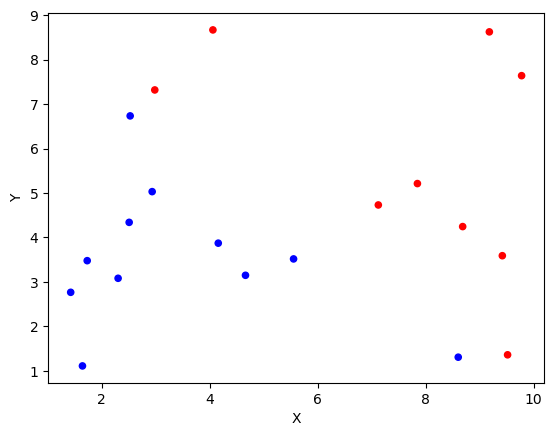

In [6]:
color = ['Red' if x == 'class0' else 'Blue' for x in df['class']]
df.plot(x = 'X',y = 'Y',kind = 'scatter',color = color)

***A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space.***

In [8]:
x_train = df.iloc[:, :2]
y_train = df.iloc[:, 2]


In [9]:
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
n= np.arange(0,10,0.1)
x=[]
y=[]
for i in n:
    for j in n:
        x.append(i)
        y.append(j)


In [11]:
data = {
    'X':x,
    'Y':y}

In [12]:
x_test=pd.DataFrame(data)


In [13]:
y_predict = knn.predict(x_test)
y_predict

array(['class1', 'class1', 'class1', ..., 'class0', 'class0', 'class0'],
      dtype=object)

<Axes: xlabel='X', ylabel='Y'>

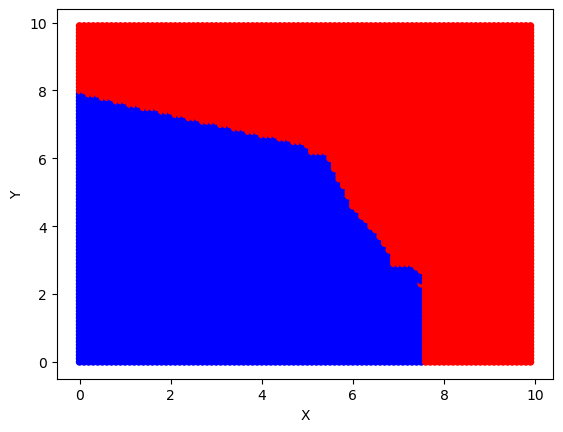

In [14]:
color = ['Red' if x == 'class0' else 'Blue' for x in y_predict]
x_test.plot(x = 'X',y = 'Y',kind = 'scatter',color = color)

***A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.***


In [16]:
#Evaluating nearest neighbour for different values of k
def diff_k_neighbors(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    color = ['Red' if x == 'class0' else 'Blue' for x in y_predict]
    x_test.plot(x = 'X',y = 'Y',kind = 'scatter',color = color)


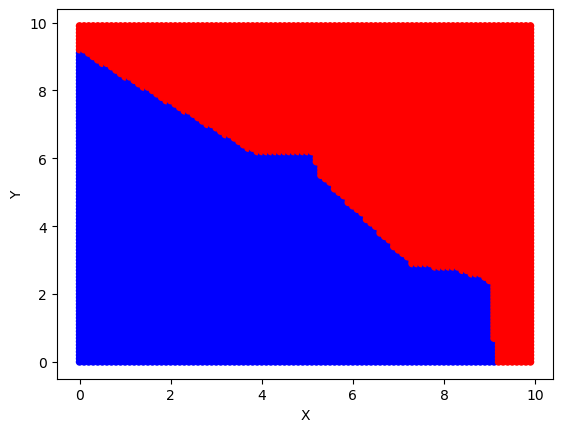

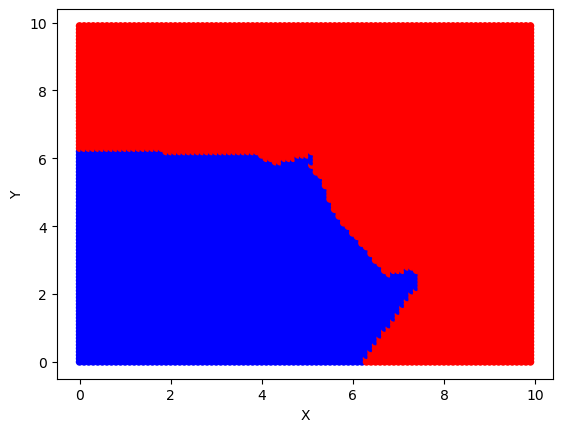

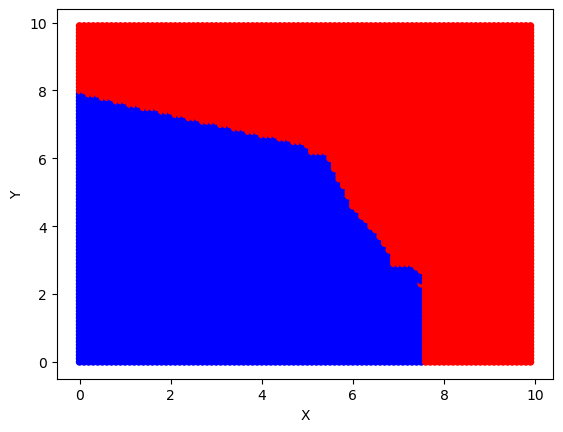

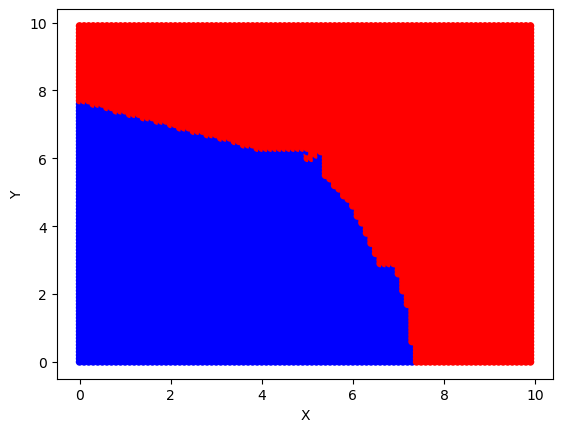

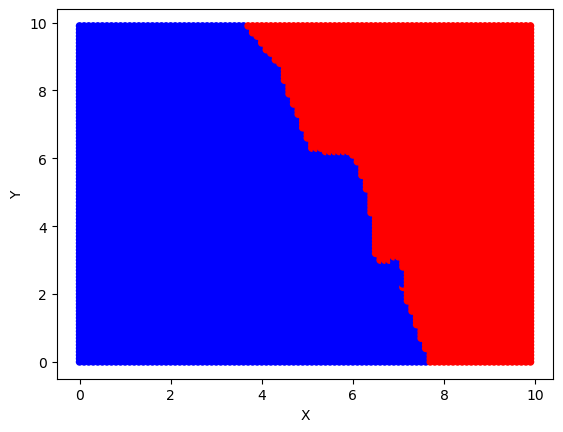

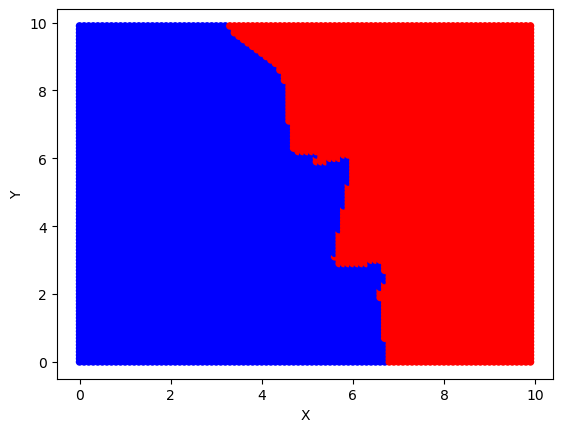

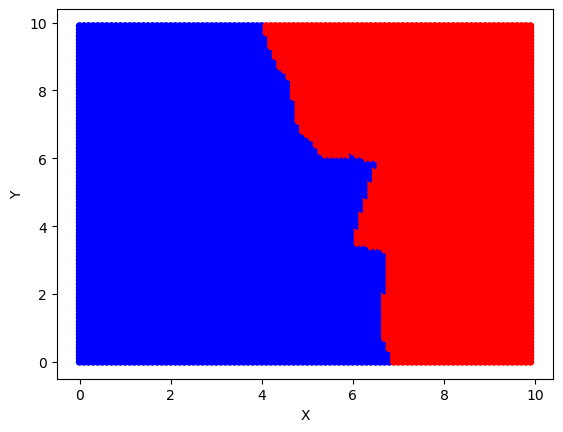

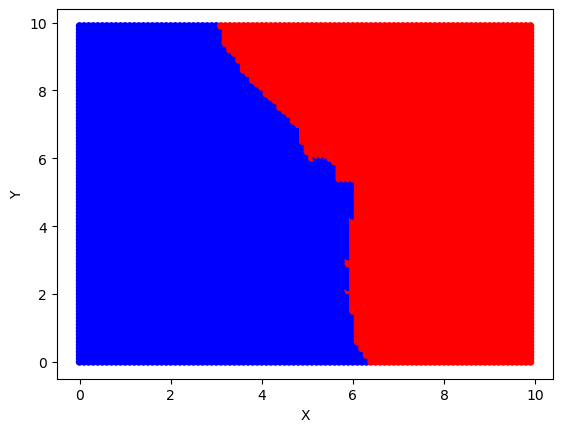

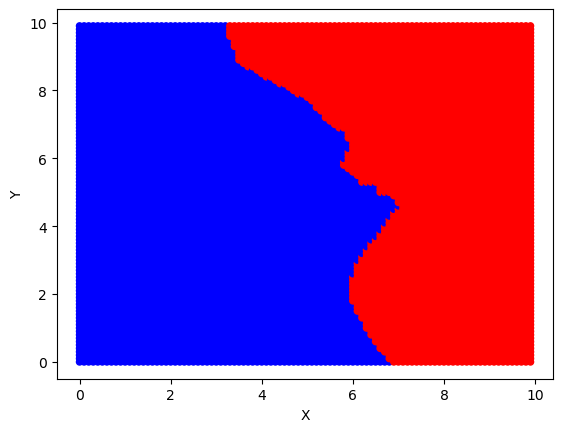

In [17]:
for i in range (1, 10):
    diff_k_neighbors(i)


***A6 Repeat the exercises A3 to A5 for your project data considering any two features and classes***

In [19]:
df = pd.DataFrame()
rows = [29,86,80,166]
for j in range(1,33):
    if j == 24:
        continue
    data = pd.read_excel(f"./data/P{j}/val_aro.xls")
    extracted_rows = data.iloc[rows,:]
    df = pd.concat([df, extracted_rows], ignore_index=True)
df.head()

,image,Valence_score,Arousal_score
0,30,6,0
1,86,5,1
2,80,2,1
3,166,3,0
4,30,8,1


In [20]:
df['class'] = df['image'].apply(lambda x: "Pleasant" if x in [30, 86] else "unpleasant")
df.head()

,image,Valence_score,Arousal_score,class
0,30,6,0,Pleasant
1,86,5,1,Pleasant
2,80,2,1,unpleasant
3,166,3,0,unpleasant
4,30,8,1,Pleasant


In [21]:
df.drop("image",axis=1,inplace = True)

In [22]:
X = df[['Valence_score', 'Arousal_score']]
y = df['class']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


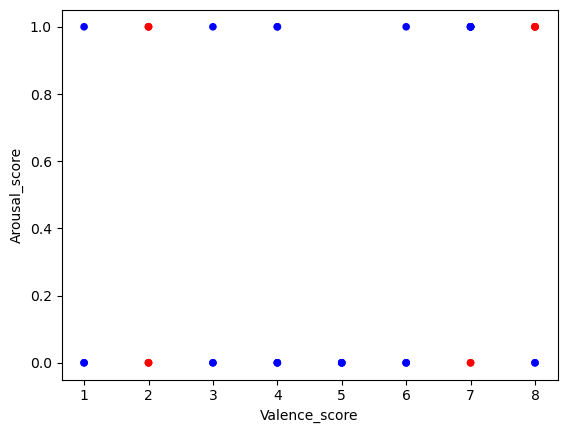

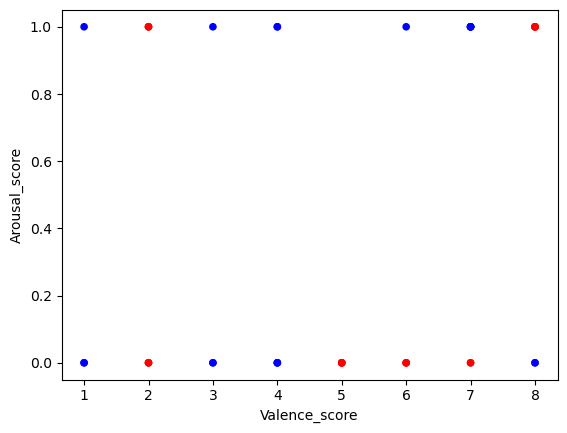

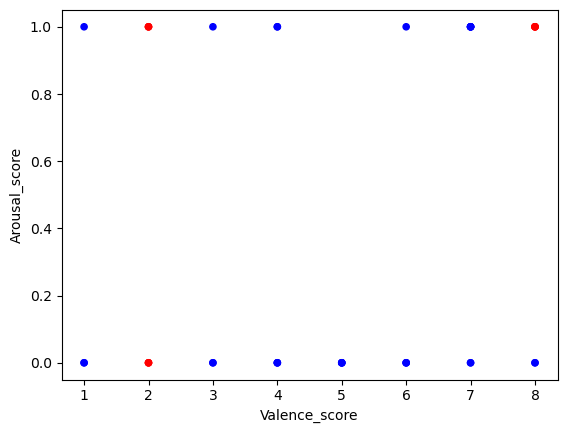

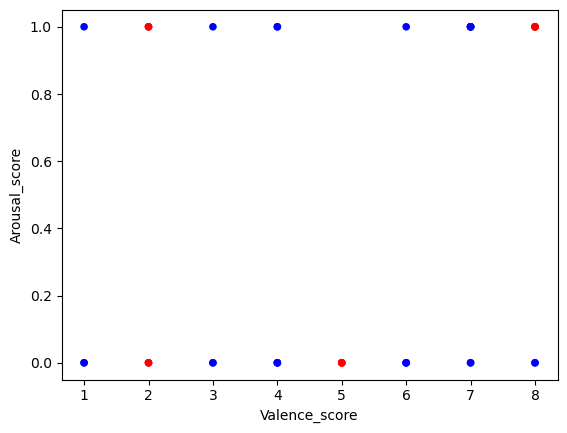

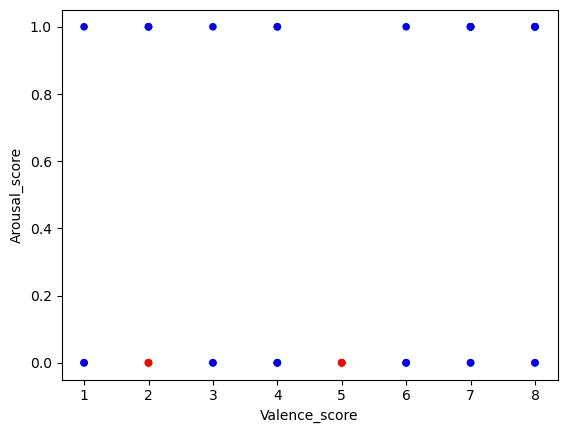

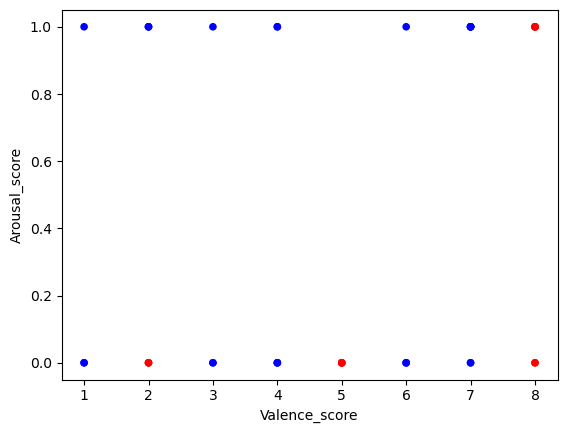

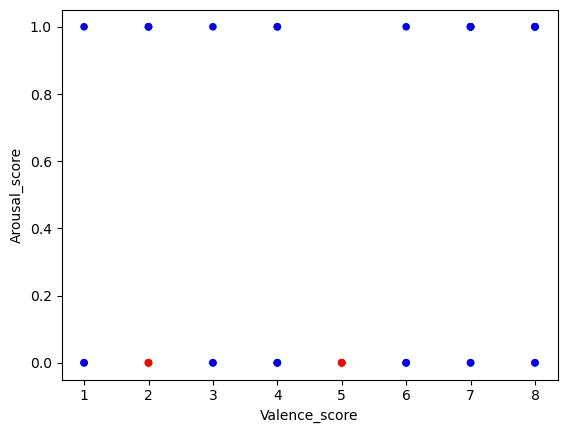

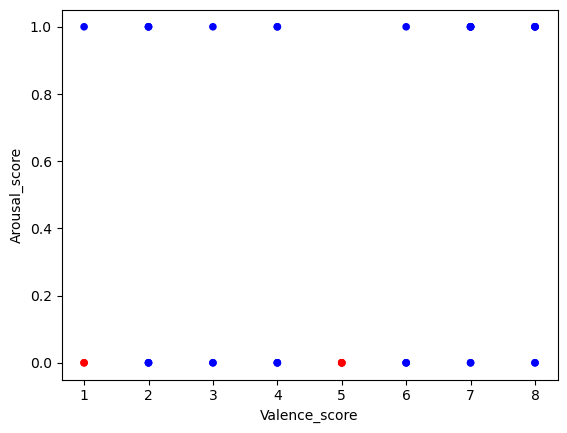

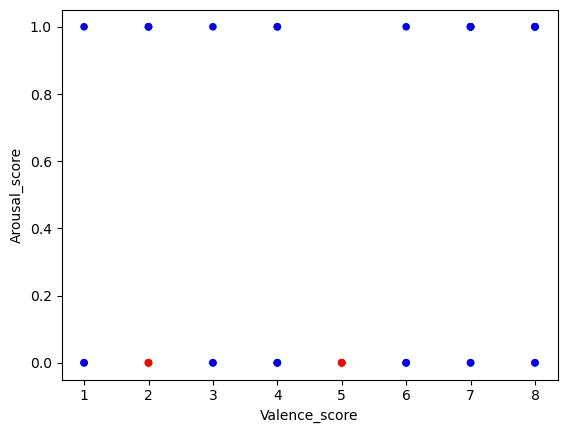

In [24]:
def KNNClassifier(k):
        # Create and train the kNN classifier with the current k
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = neigh.predict(X_test)
        color = ['Red' if x == 'Pleasant' else 'Blue' for x in y_pred]
        X_test.plot(x = 'Valence_score',y = 'Arousal_score',kind = 'scatter',color = color)
      
# Vary k from 1 to 10
k_values = range(1, 10)

# List to store accuracy for different values of k
accuracies = []

for k in k_values:
    KNNClassifier(k)

***A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning.***

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for GridSearchCV.
# In this case, we are testing different values of 'n_neighbors' (k) for the k-NN classifier.
# The range of k values to try is from 1 to 10.
param_grid = {'n_neighbors': np.arange(1, 11)}  

# 5. Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6. Get the best parameters and accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Output the results
print(f"The best value of k is: {best_k}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

# 7. Evaluate the model on the validation set (optional)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
validation_accuracy = accuracy_score(y_test, y_pred)

print(f"Validation accuracy with k={best_k}: {validation_accuracy:.4f}")

The best value of k is: 9
Best cross-validated accuracy: 0.6745
Validation accuracy with k=9: 0.6842
